## **WINE CLASSIFICATION**
#### Análisis Exploratorio de los datos
#### Detección de datos atípicos





DataSet: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


In [1]:
#Importación de librerías

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv("WineQT.csv", sep = ",")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


###**Análisis exploratorio y estudio de las variables**

En este apartado se busca identificar valores outilers o valores erroneos



In [4]:
#Tipo de dato para cada columna
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [5]:
# Identificación de datos NULOS
wine.isnull().sum() #El dataset no contiene datos nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
#Veo cuantos datos duplicados tengo
wine.duplicated().sum()

0

In [7]:
#Elimino la columna ID
wine = wine.drop(['Id'], axis=1)

In [8]:
#Veo cuantos datos duplicados tengo, luego de eliminar ID
wine.duplicated().sum()

125

In [9]:
#Elimino los datos duplicados
wine.drop_duplicates(inplace=True)

In [10]:
wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00
mean,8.29,0.53,0.27,2.52,0.09,15.65,46.33,1.00,3.31,0.66,10.45,5.64
std,1.74,0.18,0.20,1.31,0.05,10.18,33.12,0.00,0.16,0.17,1.10,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.72,11.20,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


In [11]:
#Correlación de las variables

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.236894,0.668178,0.173726,0.102446,-0.152582,-0.100716,0.683120,-0.692597,0.181277,-0.077624,0.115826
volatile acidity,-0.236894,1.000000,-0.542459,-0.008701,0.051371,-0.007556,0.071870,0.028614,0.226348,-0.280601,-0.207419,-0.409340
citric acid,0.668178,-0.542459,1.000000,0.178362,0.246843,-0.048523,0.047903,0.368832,-0.553370,0.347933,0.102134,0.241565
residual sugar,0.173726,-0.008701,0.178362,1.000000,0.058410,0.146929,0.188528,0.363112,-0.120993,0.006738,0.070779,0.022718
chlorides,0.102446,0.051371,0.246843,0.058410,1.000000,0.014612,0.044947,0.210932,-0.277536,0.392989,-0.234283,-0.122214
free sulfur dioxide,-0.152582,-0.007556,-0.048523,0.146929,0.014612,1.000000,0.661089,-0.049664,0.051018,0.031844,-0.060876,-0.071083
total sulfur dioxide,-0.100716,0.071870,0.047903,0.188528,0.044947,0.661089,1.000000,0.053496,-0.071037,0.004963,-0.197917,-0.182214
density,0.683120,0.028614,0.368832,0.363112,0.210932,-0.049664,0.053496,1.000000,-0.366173,0.138789,-0.504748,-0.185187
pH,-0.692597,0.226348,-0.553370,-0.120993,-0.277536,0.051018,-0.071037,-0.366173,1.000000,-0.192979,0.230655,-0.057592
sulphates,0.181277,-0.280601,0.347933,0.006738,0.392989,0.031844,0.004963,0.138789,-0.192979,1.000000,0.096239,0.257519


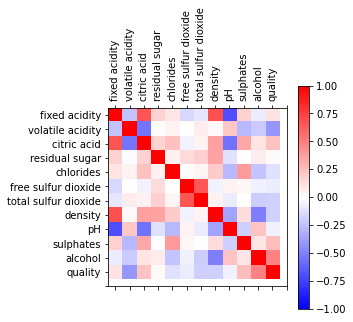

In [12]:
#Matriz de correlación (mathplotlib)

matriz = wine.corr()
plt.matshow(matriz, cmap = 'bwr', vmin=-1, vmax=1) # bwr =  blue, white, red
plt.xticks(range(13), wine.columns, rotation = 90)
plt.yticks(range(13),wine.columns)

#terminar

plt.colorbar()
plt.show()

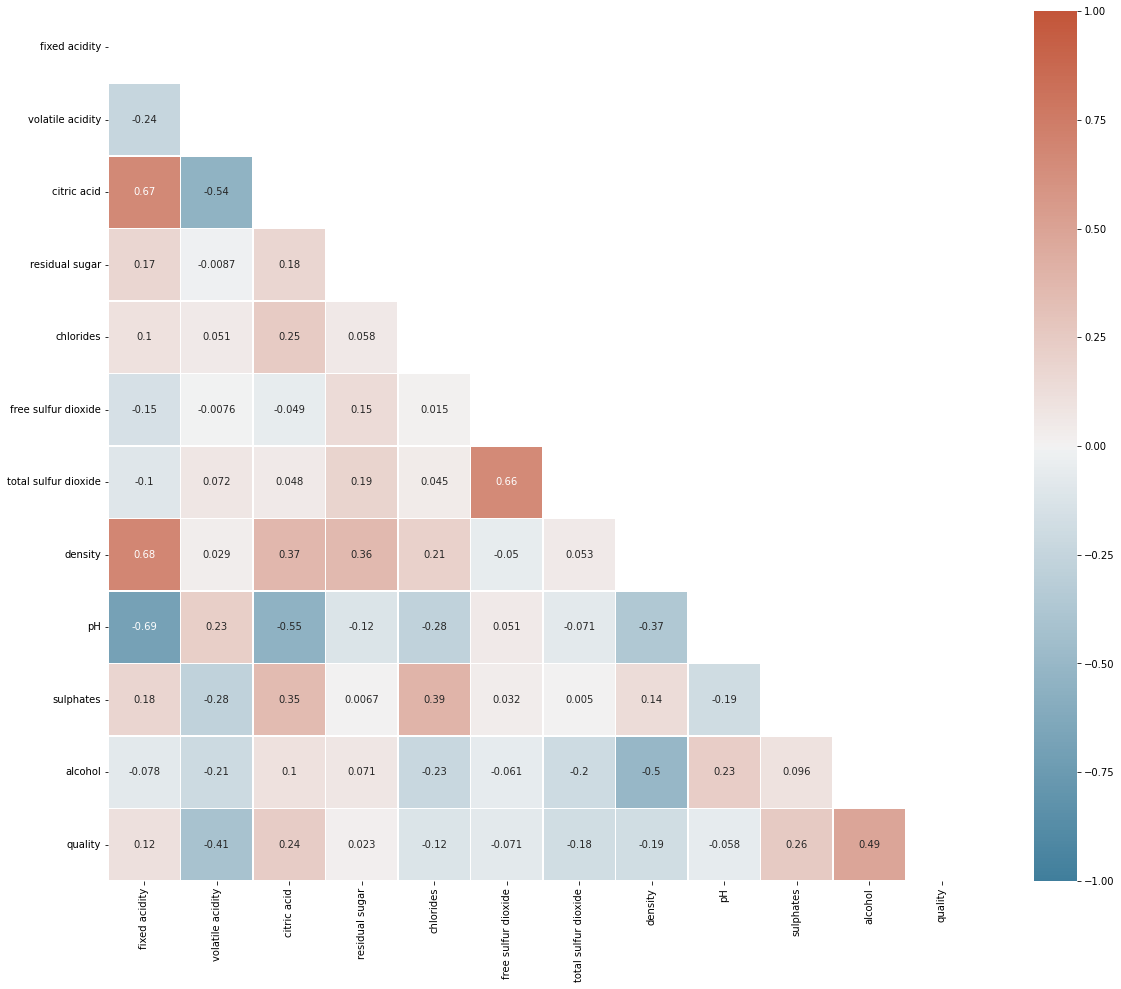

In [13]:
#Matriz de correlación (seaborn)

corr = wine.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, annot=True)

Las varibles que más correlación tinene con la calidad son: alcohol, sulphates, citric acid, volatile acidity (me baso en que la correlación sea superior a 0.2 positivo y negativo)

### Análisis individual de cada variable

En este apartado se busca entender el rango en que se mueven las variables y la distribución. También se detectan valores atípicos mediante Rango Intercuartílico.

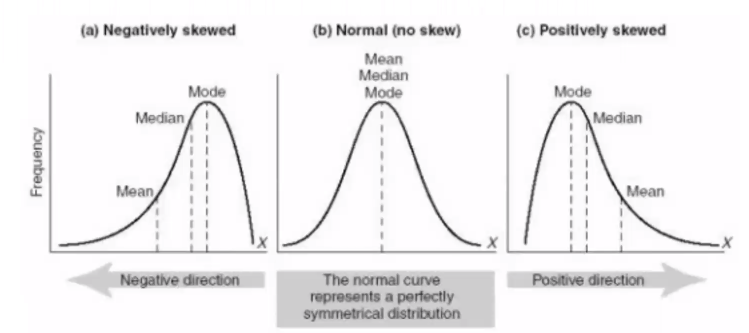

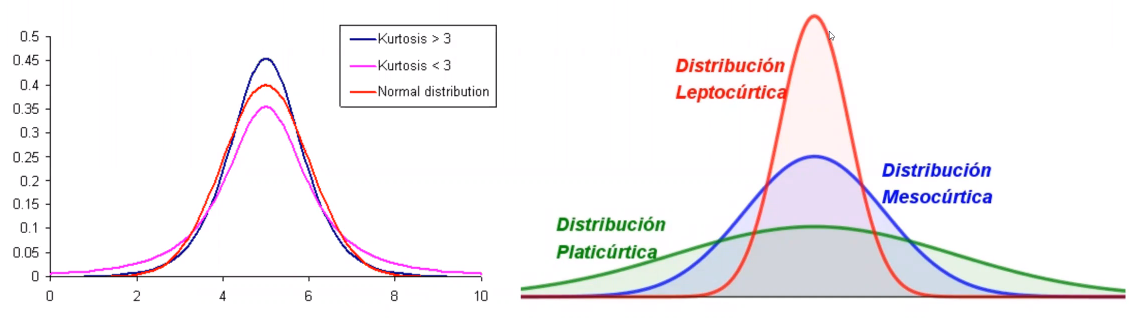

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


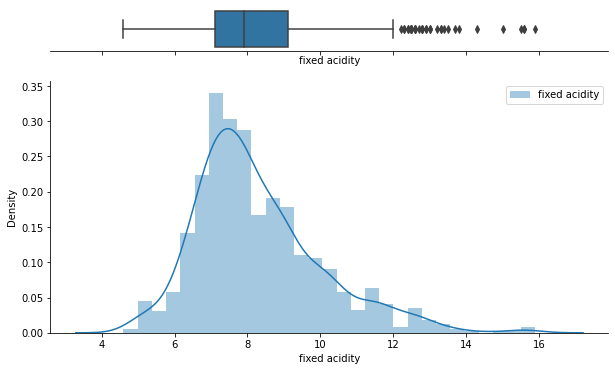

In [14]:
#Análisis gráfico de variable: fixed acidity

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['fixed acidity'], ax=ax_box) 
sns.distplot(wine['fixed acidity'], ax=ax_hist, label='fixed acidity')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [15]:
#Calculo de umbral inferior y superior variable: fixed acidity
IQR = wine['fixed acidity'].quantile(0.75) - wine['fixed acidity'].quantile(0.25)
umbral_inferior = wine['fixed acidity'].quantile(0.25) - IQR*1.5
umbral_superior = wine['fixed acidity'].quantile(0.75) + IQR*1.5


#Identifico los valores outliers en el dataframe (creo la columna flag de outlier)
wine['fixed acidity_outlier'] = 0
wine.loc[wine['fixed acidity'] > umbral_superior, 'fixed acidity_outlier'] = 1
wine.loc[wine['fixed acidity'] < umbral_inferior, 'fixed acidity_outlier'] = 1 #no hay valores por debajo del umbral inferior

In [16]:
#Cuento la cantidad de valores outliers en la variable fixed acidity
wine['fixed acidity_outlier'].value_counts()

#Se detectaron 44 datos ouliers para la variable

0    981
1     37
Name: fixed acidity_outlier, dtype: int64

Cantidad de valores Outliers: 
0    1008
1      10
Name: volatile acidity_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


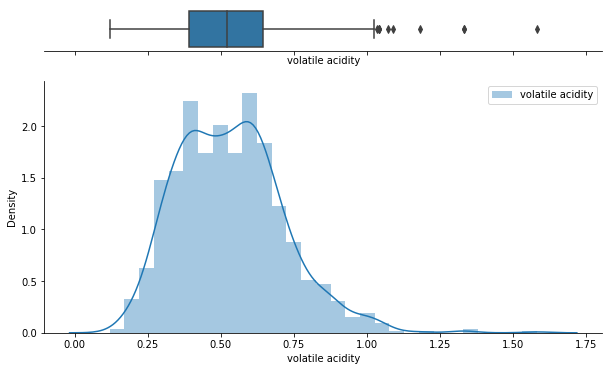

In [17]:
# Se realiza el mismo tratamiento de Outliers para las variables restantes

#Calculo de umbral inferior y superior variable: volatile acidity
IQR = wine['volatile acidity'].quantile(0.75) - wine['volatile acidity'].quantile(0.25)
umbral_inferior = wine['volatile acidity'].quantile(0.25) - IQR*1.5
umbral_superior = wine['volatile acidity'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['volatile acidity_outlier'] = 0
wine.loc[wine['volatile acidity'] > umbral_superior, 'volatile acidity_outlier'] = 1
wine.loc[wine['volatile acidity'] < umbral_inferior, 'volatile acidity_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable volatile acidity
print('Cantidad de valores Outliers: ')
print(wine['volatile acidity_outlier'].value_counts())

#Análisis gráfico de variable: fixed acidity

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['volatile acidity'], ax=ax_box) 
sns.distplot(wine['volatile acidity'], ax=ax_hist, label='volatile acidity')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1017
1       1
Name: citric acid_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


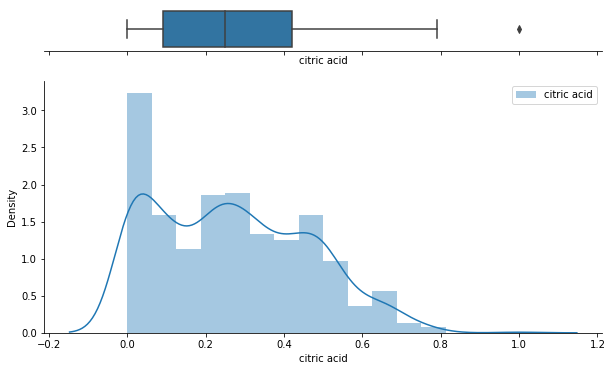

In [18]:
#Calculo de umbral inferior y superior variable: citric acid
IQR = wine['citric acid'].quantile(0.75) - wine['citric acid'].quantile(0.25)
umbral_inferior = wine['citric acid'].quantile(0.25) - IQR*1.5
umbral_superior = wine['citric acid'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['citric acid_outlier'] = 0
wine.loc[wine['citric acid'] > umbral_superior, 'citric acid_outlier'] = 1
wine.loc[wine['citric acid'] < umbral_inferior, 'citric acid_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable citric acid
print('Cantidad de valores Outliers: ')
print(wine['citric acid_outlier'].value_counts())

#Análisis gráfico de variable: citric acid

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['citric acid'], ax=ax_box) 
sns.distplot(wine['citric acid'], ax=ax_hist, label='citric acid')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#POR SER UN ÚNICO VALOR NO CONVIENE ELIMINARLO

Cantidad de valores Outliers: 
0    923
1     95
Name: residual sugar_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


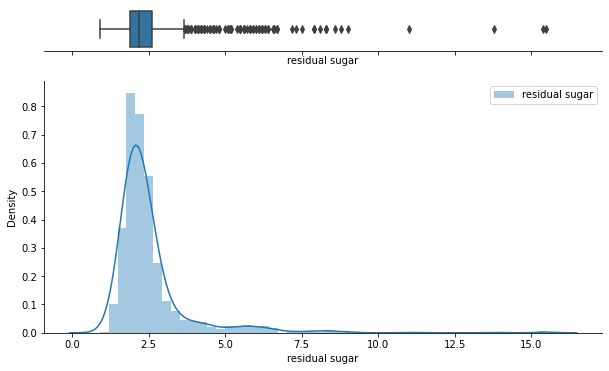

In [19]:
#Calculo de umbral inferior y superior variable: residual sugar
IQR = wine['residual sugar'].quantile(0.75) - wine['residual sugar'].quantile(0.25)
umbral_inferior = wine['residual sugar'].quantile(0.25) - IQR*1.5
umbral_superior = wine['residual sugar'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['residual sugar_outlier'] = 0
wine.loc[wine['residual sugar'] > umbral_superior, 'residual sugar_outlier'] = 1
wine.loc[wine['residual sugar'] < umbral_inferior, 'residual sugar_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable residual sugar
print('Cantidad de valores Outliers: ')
print(wine['residual sugar_outlier'].value_counts())

#Análisis gráfico de variable: residual sugar

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['residual sugar'], ax=ax_box) 
sns.distplot(wine['residual sugar'], ax=ax_hist, label='residual sugar')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#SE REGISTRA UN GRAN NÚMERO DE OUTLIERS

Cantidad de valores Outliers: 
0    947
1     71
Name: chlorides_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


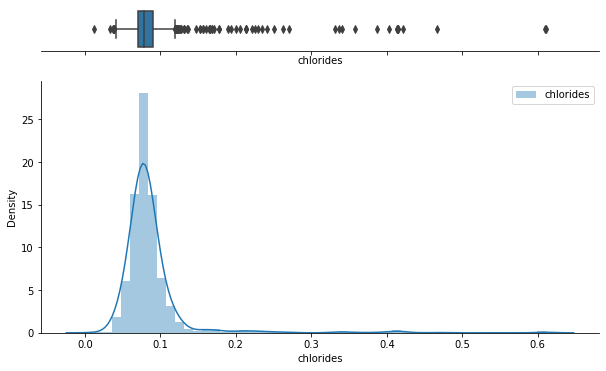

In [20]:
#Calculo de umbral inferior y superior variable: chlorides
IQR = wine['chlorides'].quantile(0.75) - wine['chlorides'].quantile(0.25)
umbral_inferior = wine['chlorides'].quantile(0.25) - IQR*1.5
umbral_superior = wine['chlorides'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['chlorides_outlier'] = 0
wine.loc[wine['chlorides'] > umbral_superior, 'chlorides_outlier'] = 1
wine.loc[wine['chlorides'] < umbral_inferior, 'chlorides_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable chlorides
print('Cantidad de valores Outliers: ')
print(wine['chlorides_outlier'].value_counts())

#Análisis gráfico de variable: chlorides

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['chlorides'], ax=ax_box) 
sns.distplot(wine['chlorides'], ax=ax_hist, label='chlorides')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1002
1      16
Name: free sulfur dioxide_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


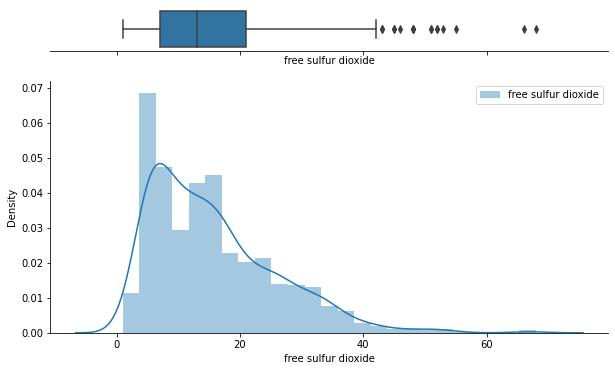

In [21]:
#Calculo de umbral inferior y superior variable: free sulfur dioxide
IQR = wine['free sulfur dioxide'].quantile(0.75) - wine['free sulfur dioxide'].quantile(0.25)
umbral_inferior = wine['free sulfur dioxide'].quantile(0.25) - IQR*1.5
umbral_superior = wine['free sulfur dioxide'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['free sulfur dioxide_outlier'] = 0
wine.loc[wine['free sulfur dioxide'] > umbral_superior, 'free sulfur dioxide_outlier'] = 1
wine.loc[wine['free sulfur dioxide'] < umbral_inferior, 'free sulfur dioxide_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable free sulfur dioxide
print('Cantidad de valores Outliers: ')
print(wine['free sulfur dioxide_outlier'].value_counts())

#Análisis gráfico de variable: free sulfur dioxide

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['free sulfur dioxide'], ax=ax_box) 
sns.distplot(wine['free sulfur dioxide'], ax=ax_hist, label='free sulfur dioxide')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    985
1     33
Name: total sulfur dioxide_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


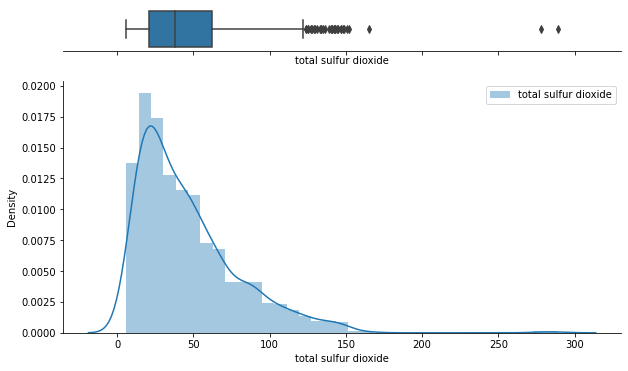

In [22]:
#Calculo de umbral inferior y superior variable: total sulfur dioxide
IQR = wine['total sulfur dioxide'].quantile(0.75) - wine['total sulfur dioxide'].quantile(0.25)
umbral_inferior = wine['total sulfur dioxide'].quantile(0.25) - IQR*1.5
umbral_superior = wine['total sulfur dioxide'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['total sulfur dioxide_outlier'] = 0
wine.loc[wine['total sulfur dioxide'] > umbral_superior, 'total sulfur dioxide_outlier'] = 1
wine.loc[wine['total sulfur dioxide'] < umbral_inferior, 'total sulfur dioxide_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable total sulfur dioxide
print('Cantidad de valores Outliers: ')
print(wine['total sulfur dioxide_outlier'].value_counts())

#Análisis gráfico de variable: total sulfur dioxide
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['total sulfur dioxide'], ax=ax_box) 
sns.distplot(wine['total sulfur dioxide'], ax=ax_hist, label='total sulfur dioxide')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    988
1     30
Name: density_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


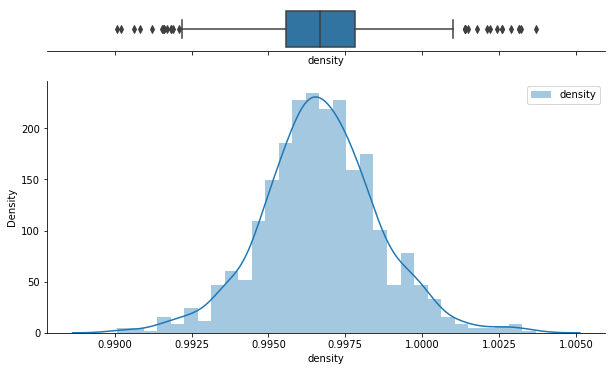

In [23]:
#Calculo de umbral inferior y superior variable: density
IQR = wine['density'].quantile(0.75) - wine['density'].quantile(0.25)
umbral_inferior = wine['density'].quantile(0.25) - IQR*1.5
umbral_superior = wine['density'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['density_outlier'] = 0
wine.loc[wine['density'] > umbral_superior, 'density_outlier'] = 1
wine.loc[wine['density'] < umbral_inferior, 'density_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable density
print('Cantidad de valores Outliers: ')
print(wine['density_outlier'].value_counts())

#Análisis gráfico de variable: density
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['density'], ax=ax_box) 
sns.distplot(wine['density'], ax=ax_hist, label='density')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    994
1     24
Name: pH_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


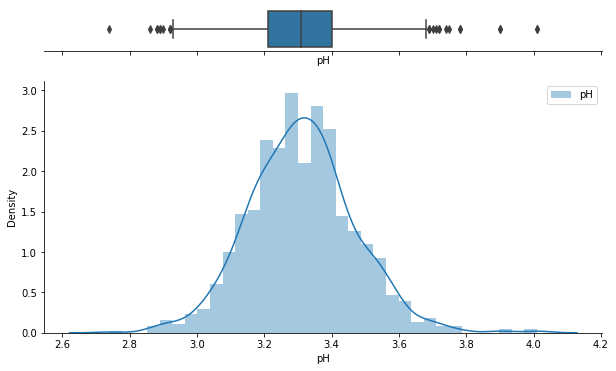

In [24]:
#Calculo de umbral inferior y superior variable: pH
IQR = wine['pH'].quantile(0.75) - wine['pH'].quantile(0.25)
umbral_inferior = wine['pH'].quantile(0.25) - IQR*1.5
umbral_superior = wine['pH'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['pH_outlier'] = 0
wine.loc[wine['pH'] > umbral_superior, 'pH_outlier'] = 1
wine.loc[wine['pH'] < umbral_inferior, 'pH_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable pH
print('Cantidad de valores Outliers: ')
print(wine['pH_outlier'].value_counts())

#Análisis gráfico de variable: pH
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['pH'], ax=ax_box) 
sns.distplot(wine['pH'], ax=ax_hist, label='pH')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    977
1     41
Name: sulphates_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


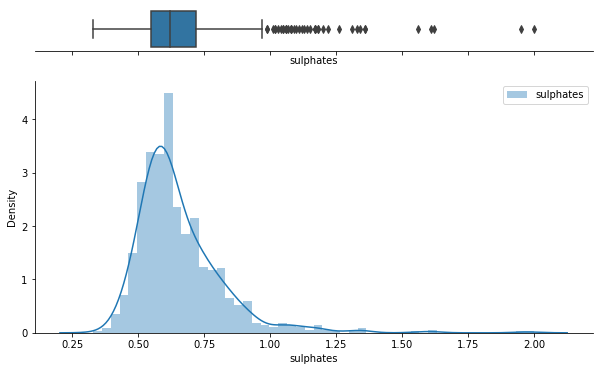

In [25]:
#Calculo de umbral inferior y superior variable: sulphates	                         alcohol	quality	
IQR = wine['sulphates'].quantile(0.75) - wine['sulphates'].quantile(0.25)
umbral_inferior = wine['sulphates'].quantile(0.25) - IQR*1.5
umbral_superior = wine['sulphates'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['sulphates_outlier'] = 0
wine.loc[wine['sulphates'] > umbral_superior, 'sulphates_outlier'] = 1
wine.loc[wine['sulphates'] < umbral_inferior, 'sulphates_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable sulphates
print('Cantidad de valores Outliers: ')
print(wine['sulphates_outlier'].value_counts())

#Análisis gráfico de variable: sulphates
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['sulphates'], ax=ax_box) 
sns.distplot(wine['sulphates'], ax=ax_hist, label='sulphates')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1012
1       6
Name: alcohol_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


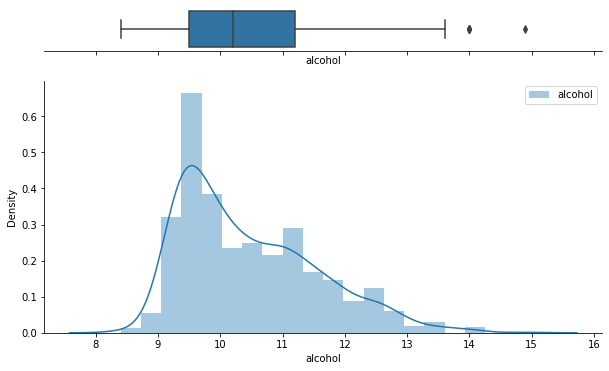

In [26]:
#Calculo de umbral inferior y superior variable: alcohol	                         	quality	
IQR = wine['alcohol'].quantile(0.75) - wine['alcohol'].quantile(0.25)
umbral_inferior = wine['alcohol'].quantile(0.25) - IQR*1.5
umbral_superior = wine['alcohol'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['alcohol_outlier'] = 0
wine.loc[wine['alcohol'] > umbral_superior, 'alcohol_outlier'] = 1
wine.loc[wine['alcohol'] < umbral_inferior, 'alcohol_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable alcohol
print('Cantidad de valores Outliers: ')
print(wine['alcohol_outlier'].value_counts())

#Análisis gráfico de variable: alcohol
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['alcohol'], ax=ax_box) 
sns.distplot(wine['alcohol'], ax=ax_hist, label='alcohol')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    997
1     21
Name: quality_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


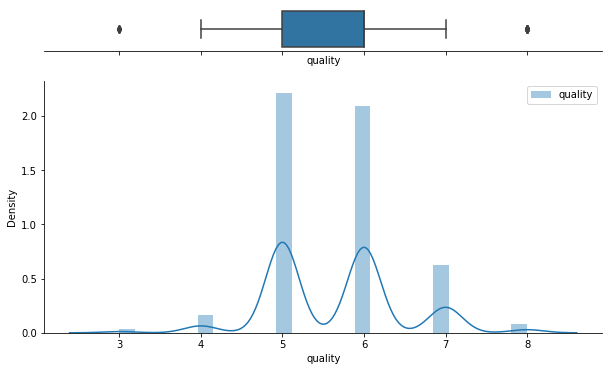

In [27]:
#Calculo de umbral inferior y superior variable: quality                         		
IQR = wine['quality'].quantile(0.75) - wine['quality'].quantile(0.25)
umbral_inferior = wine['quality'].quantile(0.25) - IQR*1.5
umbral_superior = wine['quality'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['quality_outlier'] = 0
wine.loc[wine['quality'] > umbral_superior, 'quality_outlier'] = 1
wine.loc[wine['quality'] < umbral_inferior, 'quality_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable quality
print('Cantidad de valores Outliers: ')
print(wine['quality_outlier'].value_counts())

#Análisis gráfico de variable: quality
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['quality'], ax=ax_box) 
sns.distplot(wine['quality'], ax=ax_hist, label='quality')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#No hay puntaje decimal

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

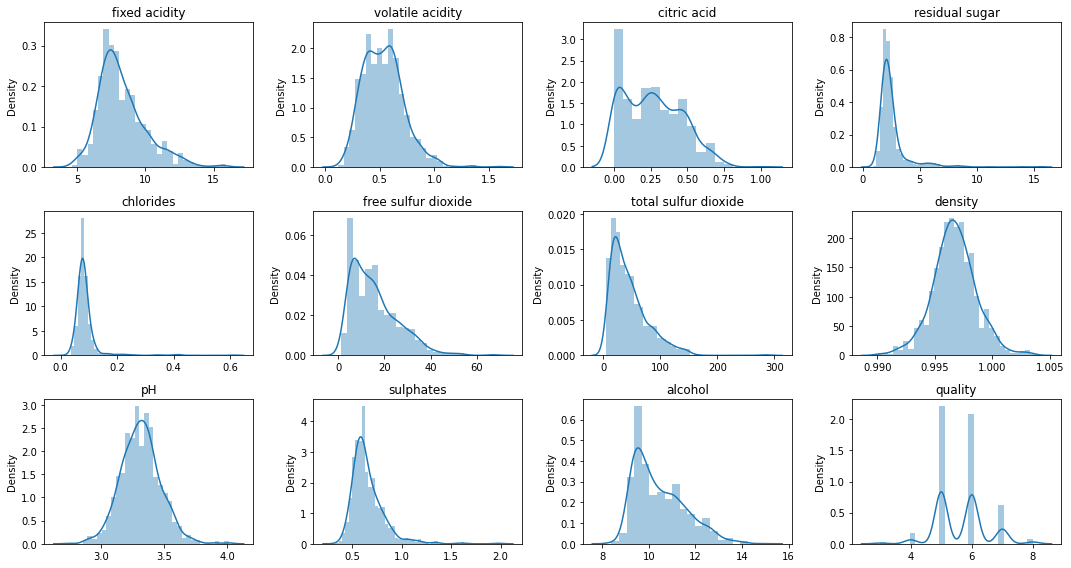

In [28]:
#Agrupamos los gráficos (subplots)

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8)) #Creo el objeto, la cuadrícula

for current_idx, variable in enumerate(variables):
    i = current_idx // columns #Coordenadas de la cuadrícula
    j = current_idx % columns
    sns.distplot(wine[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

#### Categorías para clasificación

Se procede a realizar agurpaciones de los vinos, en base a 3 categorías:
- Vinos Malos: cuando puntaje de calidad sea de 4 o inferior.
- Vinos Intermedios: cuando el puntaje de calidad sea de 5 a 7
- Vinos Exelentes: cuando el puntaje de calidad sea 8 o superior

In [29]:
#se crea la columna Dictamen, donde se alojaran las categorías mencionadas (Vino: Malo, Intermedio, Excelente)

wine['Dictamen'] = 0


wine.loc[wine['quality'] <= 4, 'Dictamen'] = 'Malo'
wine.loc[(wine['quality'] > 4) & (wine['quality'] <= 7), 'Dictamen' ] = 'Intermedio'
wine.loc[wine['quality'] > 7, 'Dictamen'] = 'Excelente'

print('Conteo de valores por categorías:')
print(wine['Dictamen'].value_counts())
print('\nConteo de valores por categorías en porcentaje:')
print(wine['Dictamen'].value_counts(normalize=True)*100)

#Podemos ver claramente como el set de datos se encuentra desbalanceado

Conteo de valores por categorías:
Intermedio    964
Malo           39
Excelente      15
Name: Dictamen, dtype: int64

Conteo de valores por categorías en porcentaje:
Intermedio    94.695481
Malo           3.831041
Excelente      1.473477
Name: Dictamen, dtype: float64


In [30]:
#Exploración de los datos:
#Se analizará la métrica fixed acidity con respecto a las categorías

wine_malo = wine.copy()

wine_malo.drop(wine_malo.loc[wine_malo['Dictamen'] == 'Intermedio'].index, inplace=True)
wine_malo.drop(wine_malo.loc[wine_malo['Dictamen'] == 'Excelente'].index, inplace=True)

wine_malo


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,residual sugar_outlier,chlorides_outlier,free sulfur dioxide_outlier,total sulfur dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier,quality_outlier,Dictamen
29,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,...,0,0,0,0,0,0,0,0,0,Malo
32,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,...,0,0,0,0,0,1,0,0,0,Malo
50,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,...,0,0,0,0,0,0,0,0,0,Malo
54,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,...,0,0,0,0,0,0,1,0,0,Malo
66,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,...,0,0,0,0,0,1,0,0,0,Malo
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,...,0,1,0,0,0,1,1,0,0,Malo
112,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,...,0,0,0,0,0,0,1,0,0,Malo
118,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,...,0,0,0,0,0,0,0,0,0,Malo
120,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,...,0,0,0,0,0,0,0,0,0,Malo
142,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,...,0,0,0,0,0,0,0,0,0,Malo


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


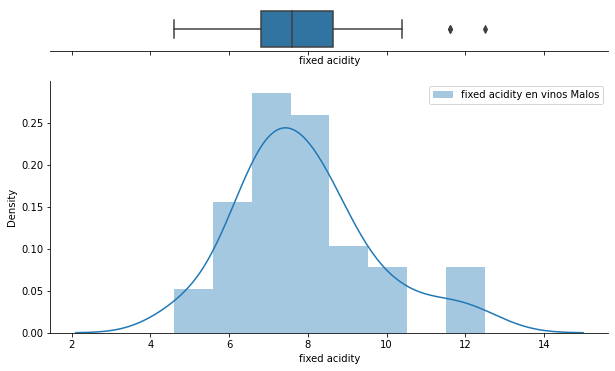

In [31]:
#Análisis gráfico de variable: fixed acidity en vinos Malos

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine_malo['fixed acidity'], ax=ax_box) 
sns.distplot(wine_malo['fixed acidity'], ax=ax_hist, label='fixed acidity en vinos Malos')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()


In [32]:
# Realizar gráfico mediante group by